In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer

# Base de données sur le cancer du sein

In [2]:
data = pd.read_csv(r"C:\Users\lahat\Documents\M2IMSD\Formation_ML_Udemy\KNN\cancer_du_sein-wisconsin.csv")

In [3]:
data.head()

,identification,Épaisseur,Uniformité_taille_cellules,Uniformité_forme_cellules,Adhérence_marginale,Taille_cellules_épithéliale,Nue_Nuclei,Bland_Chromatin,Nucleoli_Normal,Mitoses,Classe
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [5]:
data.shape

(699, 11)

In [11]:
data.dtypes

identification                   int64
Épaisseur                        int64
Uniformité_taille_cellules       int64
Uniformité_forme_cellules        int64
Adhérence_marginale              int64
Taille_cellules_épithéliale      int64
Nue_Nuclei                     float64
Bland_Chromatin                  int64
Nucleoli_Normal                  int64
Mitoses                          int64
Classe                           int64
dtype: object

In [13]:
data.isnull().sum()

identification                  0
Épaisseur                       0
Uniformité_taille_cellules      0
Uniformité_forme_cellules       0
Adhérence_marginale             0
Taille_cellules_épithéliale     0
Nue_Nuclei                     16
Bland_Chromatin                 0
Nucleoli_Normal                 0
Mitoses                         0
Classe                          0
dtype: int64

In [14]:
data.columns

Index(['identification', 'Épaisseur', 'Uniformité_taille_cellules',
       'Uniformité_forme_cellules', 'Adhérence_marginale',
       'Taille_cellules_épithéliale', 'Nue_Nuclei', 'Bland_Chromatin',
       'Nucleoli_Normal', 'Mitoses', 'Classe'],
      dtype='object')

# Modèle 1 

In [15]:
X = data[['Épaisseur','Taille_cellules_épithéliale']].values

In [16]:
target = data['Classe'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42, stratify=target)

In [26]:
# Initialisation du classifieur KNN avec 3 voisins
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [27]:
# Adapter les classifieur aux données d'entrainement
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
y_pred = knn_classifier.predict(X_test)

# Evaluation du modèle 1


In [29]:
# Extraire le score de précision des ensembles de test
knn_classifier.score(X_test, y_test)

0.9

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[128,  10],
       [ 11,  61]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\lahat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


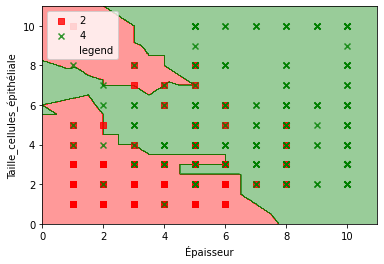

In [40]:
def affichage_region_dec(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # trace la surface de décision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='legend')
      
      
X_combine = np.vstack((X_train, X_test))
#Empilez les tableaux en séquence verticalement 
y_combine = np.hstack((y_train, y_test))
#Empilez les tableaux en séquence horizontalement

affichage_region_dec(X_combine,
                      y_combine, classifier=knn_classifier,
                      test_idx=range(105,150))
   
plt.xlabel('Épaisseur')
plt.ylabel('Taille_cellules_épithéliale')
plt.legend(loc='upper left')
plt.show()  

# Model 2

In [62]:
# X prend plusieurs paramètres : supérieurs à deux
X_ = data.iloc[:,-10:-1].values

In [63]:
target_ = data['Classe'].values

In [64]:
data.isnull().any()

identification                 False
Épaisseur                      False
Uniformité_taille_cellules     False
Uniformité_forme_cellules      False
Adhérence_marginale            False
Taille_cellules_épithéliale    False
Nue_Nuclei                      True
Bland_Chromatin                False
Nucleoli_Normal                False
Mitoses                        False
Classe                         False
dtype: bool

In [71]:
imptr = SimpleImputer(missing_values=np.nan, strategy='mean')
imptr=imptr.fit(X_[:,5:6])
X_[:,5:6]=imptr.transform(X_[:,5:6])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_, target_, test_size=0.3, random_state=42, stratify=target)

In [73]:
# Initialisation du classifieur KNN avec 3 voisins
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [74]:
# Adapter les classifieur aux données d'entrainement
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [75]:
y_pred = knn_classifier.predict(X_test)

# Evaluation du modèle 2

In [76]:
# Extraire le score de précision des ensembles de test
knn_classifier.score(X_test, y_test)

0.9619047619047619

In [77]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[133,   5],
       [  3,  69]], dtype=int64)